# 🐕🐶 Multiclass Dog Breed Classification
Dog breed classification using Tensorflow and Tensorflow Hub.<br><br>

## 1. Problem
Identifying the breed of dog given an image of dog.

## 2. Data
The data we are using is from Kaggle dog breed identification.<br>
https://www.kaggle.com/c/dog-breed-identification

## 3. Evaluation
A file with prediction probabilities for each dog breed of each test image.<br>
https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## 4. Features
Some informtion about data
* We are dealing with images (unstructured data) so its best we use deep learning and/or transfer learning.
* There are 120 dog breeds which in turn means there are 120 different classes.
* There are around 10,000+ image in the test set. There images have no labels because we will predict them.

### Getting the workspace ready
* Import tensorflow
* Import TensorFlow Hub
* Make sure we are using a GPU

In [1]:
# importing tensorflow in colab
import tensorflow as tf
import tensorflow_hub as hub

print(tf.__version__)
print(hub.__version__)

# Check for GPU availability
print(
    "GPU",
    "available (YES)" if tf.config.list_physical_devices("GPU") else "Not available :(",
)

2.10.1
0.16.1
GPU available (YES)


## Getting our data ready
With all machine learning models, our data has to be in numerical format.<br>
Turning our images into tensors.

In [2]:
# Checkout the labels of our data
import pandas as pd

labels_csv = pd.read_csv("Dog Vision/labels.csv")
labels_csv.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

In [3]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<Axes: xlabel='breed'>

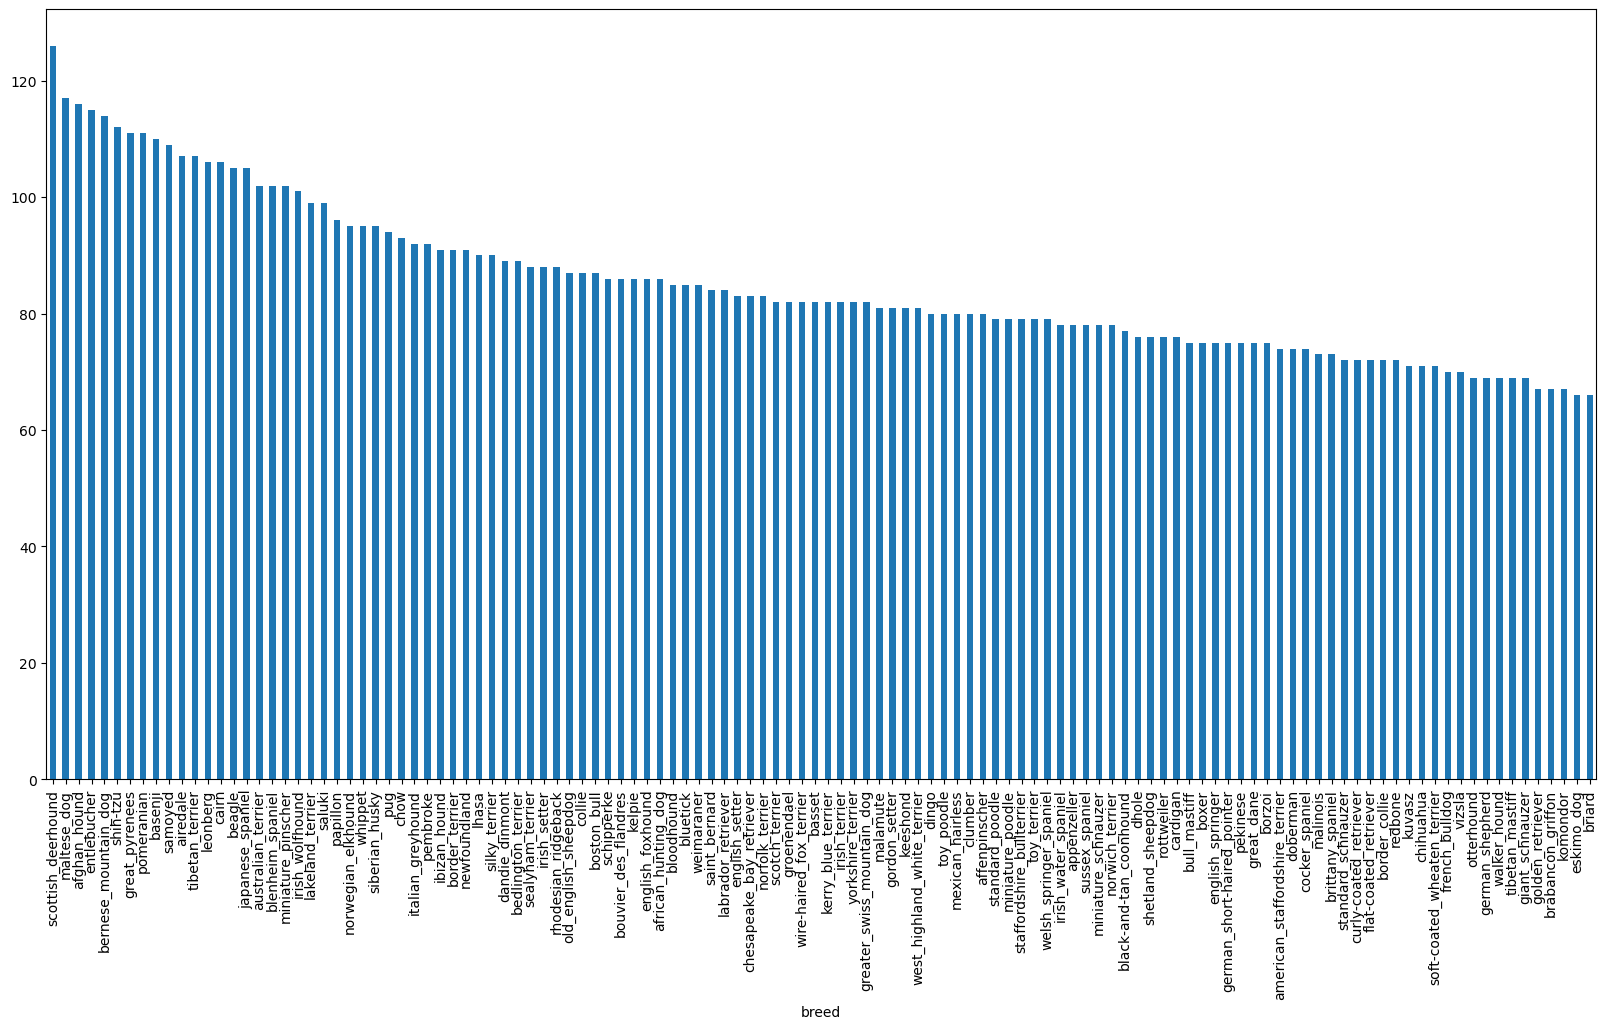

In [4]:
# How many images are there per breed
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

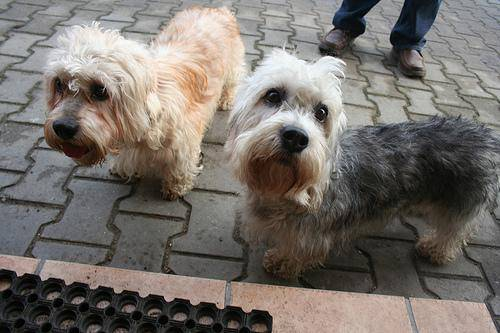

In [5]:
# Viewing an image
from IPython.display import Image

Image("Dog Vision/train/0a96f376d746b191fcc6e4812a603f7f.jpg")

### Getting images and their labels
Getting list of all file pathnames

In [6]:
# Create path names using image id
filenames = ["Dog Vision/train/" + i + ".jpg" for i in labels_csv["id"]]
filenames[:10]

['Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [7]:
# Check whether no. of file names matches with actual image files
import os

if len(os.listdir("Dog Vision/train")) == len(filenames):
    print("Matched")
else:
    print("unmatched")

Matched


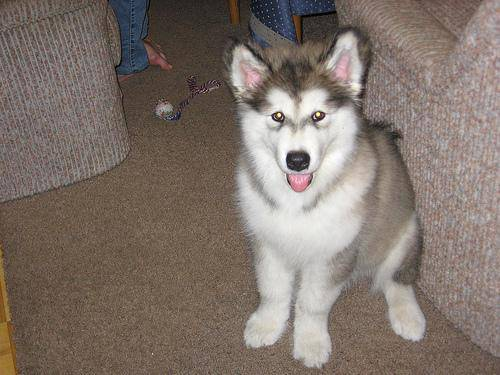

In [8]:
# One more check
Image(filenames[3000])

In [9]:
labels_csv["breed"][3000]

'malamute'

Since we have our image paths in list, lets prepare the labels.

In [10]:
import numpy as np


labels = labels_csv["breed"]

labels = np.array(labels)

In [11]:
len(labels)

10222

In [12]:
# See if number of labels matches number of file names
if len(labels) == len(filenames):
    print("No. of labels matches with filenames")
else:
    print("Does not match")

No. of labels matches with filenames


In [13]:
# Find the unique label values
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [14]:
len(unique_breeds)

120

In [15]:
# Turn single label into an array of boolean
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [16]:
# Turn every label into boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [17]:
len(boolean_labels)

10222

In [18]:
# Turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set
Since Kaggle dosent come with a validation set, we create our own validation set.

In [19]:
# Setup X and y labels
X = filenames
y = boolean_labels

We are going to start off with ~1000 images and increase as it needs.

In [20]:
# Set number of images use for experimenting
NUM_IMAGES = 1000  # @param {type:"slider", min:1000, max:10000, step:1000}

In [21]:
# Splitting data in train and validation set
from sklearn.model_selection import train_test_split

# Split data into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(
    X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42
)
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

## Preprocessing images (Turning images into tensors)
To preprocess our images into tensors, we write function which does few things.
1. Take filepath as input
2. Use tensorflow to read the file and save it to variable, `image`.
3. Turn our `image` into tensors
4. Normalize the image (Convert color channels from 0-255 to 0-1)
5. Resize the image to be a shape of (224, 224)
6. Return the modified image

Before we do, lets see importing image looks like


In [22]:
# Convert image to numpy array
from matplotlib.pyplot import imread

image = imread(filenames[42])
image.shape

(257, 350, 3)

In [23]:
image = imread(filenames[2020])
image.shape

(156, 200, 3)

In [24]:
image

array([[[160, 116,  89],
        [157, 113,  86],
        [157, 113,  86],
        ...,
        [119,  94, 100],
        [112,  87,  93],
        [100,  75,  81]],

       [[163, 119,  92],
        [160, 116,  89],
        [160, 116,  89],
        ...,
        [120,  95, 101],
        [113,  88,  94],
        [100,  75,  81]],

       [[167, 123,  96],
        [165, 121,  94],
        [165, 121,  94],
        ...,
        [122,  95, 102],
        [115,  88,  95],
        [102,  75,  82]],

       ...,

       [[136, 116,  63],
        [167, 146,  93],
        [185, 162, 110],
        ...,
        [141, 108,  67],
        [120,  85,  45],
        [134,  96,  57]],

       [[141, 120,  67],
        [165, 144,  91],
        [177, 154, 102],
        ...,
        [126,  93,  52],
        [103,  68,  28],
        [124,  86,  47]],

       [[164, 143,  90],
        [160, 139,  86],
        [147, 121,  70],
        ...,
        [135, 102,  61],
        [112,  77,  37],
        [109,  71,  32]]

In [25]:
# Turn image into a tensor
tf.constant(image)

<tf.Tensor: shape=(156, 200, 3), dtype=uint8, numpy=
array([[[160, 116,  89],
        [157, 113,  86],
        [157, 113,  86],
        ...,
        [119,  94, 100],
        [112,  87,  93],
        [100,  75,  81]],

       [[163, 119,  92],
        [160, 116,  89],
        [160, 116,  89],
        ...,
        [120,  95, 101],
        [113,  88,  94],
        [100,  75,  81]],

       [[167, 123,  96],
        [165, 121,  94],
        [165, 121,  94],
        ...,
        [122,  95, 102],
        [115,  88,  95],
        [102,  75,  82]],

       ...,

       [[136, 116,  63],
        [167, 146,  93],
        [185, 162, 110],
        ...,
        [141, 108,  67],
        [120,  85,  45],
        [134,  96,  57]],

       [[141, 120,  67],
        [165, 144,  91],
        [177, 154, 102],
        ...,
        [126,  93,  52],
        [103,  68,  28],
        [124,  86,  47]],

       [[164, 143,  90],
        [160, 139,  86],
        [147, 121,  70],
        ...,
        [135, 102,  6

Now we saw how image looks in tensor, we create a function to preprocess them

In [26]:
# Defining image size
IMG_SIZE = 224


# Creating function to preprocess images
def process_image(image_path, img_size=IMG_SIZE):
    """
    Takes an image file path and turns the image into a Tensor
    """
    # Read image file
    image = tf.io.read_file(image_path)

    # Turn image into numerical tensor with 3 color channel(RGB)
    image = tf.image.decode_jpeg(image, channels=3)

    # Convert color channel value from 0-255 to 0-1 values
    image = tf.image.convert_image_dtype(image, tf.float32)

    # Resize the image
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

    return image

## Turning our data into batches
Why turn data into batches?
If we try to process 10,000 images in one go, they might not fit in the memory. So that's why we do 32 images batch size. (batch size can be manipulated manually)

In order to use tensorflow effectively, we need our data in the form of tensor tuples which looks like `(image, labels)`.

In [27]:
# Create a function to return a tuple (image, label)
def get_image_label(image_path, label):
    image = process_image(image_path)
    return image, label

Now, we have turned our data into tuples of Tensors in the form `(image, label)`, lets make a function to turn all of our data (x & y) into batches.

In [28]:
# define batch size
BATCH_SIZE = 32


# Create a function to turn data into batches
def create_data_batches(
    X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False
):
    """
    Creates batches of data out of image (X) and label (y) pairs.
    Shuffles the data if its training data but dosent shuffle if its validatoin data.
    Also accepts test data as input (no labels).
    """
    # If data is test data set, we probably dont have labels
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices(
            (tf.constant(X))
        )  # only file paths and no labels
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch

    # If data is a valid dataset, we dont need to shuffle it
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices(
            (tf.constant(X), tf.constant(y))  # filepaths
        )  # labels
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    else:
        print("Creating training data batches")
        # Turn filepaths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))

        # Shuffling labels and pathnames before mapping, image processor function is faster than shuffling images
        data = data.shuffle(buffer_size=len(X))

        # Create (image, label) tuples (this also turns the image path into preprocessed image)
        data = data.map(get_image_label)

        # Turn the training data into batches
        data_batch = data.batch(BATCH_SIZE)

    return data_batch

In [29]:
# Creating training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches
Creating validation data batches...


In [30]:
# Checking different attributes of data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visulaizing data batches
Our data is now in batches, however these can be little hard to understand. Lets visulaize them

In [31]:
import matplotlib.pyplot as plt


# Create function for viewing images in data batches


def show_25_images(images, labels):
    """
    Displays a plot of 25 images and their labels from a data batch.
    """

    # Setup the figure
    plt.figure(figsize=(10, 10))

    # loop through 25 (for displaying 25 images)
    for i in range(25):

        # Create the subplots (5 rows, 5 columns)
        ax = plt.subplot(5, 5, i + 1)

        # Display the image
        plt.imshow(images[i])

        # Add the image label as title
        plt.title(unique_breeds[labels[i].argmax()])

        # Turn axis off
        plt.axis("off")

In [32]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [33]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[0.38253656, 0.33005056, 0.39671725],
          [0.39007288, 0.33761382, 0.4041996 ],
          [0.3882505 , 0.33652484, 0.4009104 ],
          ...,
          [0.6425558 , 0.5580867 , 0.42135274],
          [0.64060557, 0.5465585 , 0.37419435],
          [0.6989901 , 0.5822009 , 0.400487  ]],
 
         [[0.23527732, 0.22053643, 0.26486418],
          [0.2631716 , 0.24654028, 0.29140618],
          [0.30117124, 0.274853  , 0.3158876 ],
          ...,
          [0.591317  , 0.5246922 , 0.388734  ],
          [0.60727173, 0.52386594, 0.3482765 ],
          [0.6351768 , 0.53510714, 0.34835058]],
 
         [[0.24187677, 0.2657213 , 0.31404063],
          [0.24192405, 0.26956236, 0.3097672 ],
          [0.24611345, 0.26242998, 0.30113798],
          ...,
          [0.47172153, 0.4274753 , 0.30893174],
          [0.6263348 , 0.568551  , 0.40058115],
          [0.591305  , 0.51581454, 0.33219227]],
 
         ...,
 
         [[0.7795137 , 0.6720558 , 0.494955  ],
          [0.73814

In [34]:
# Returns 32 images and labels as the batch size is 32
len(train_images), len(train_labels)

(32, 32)

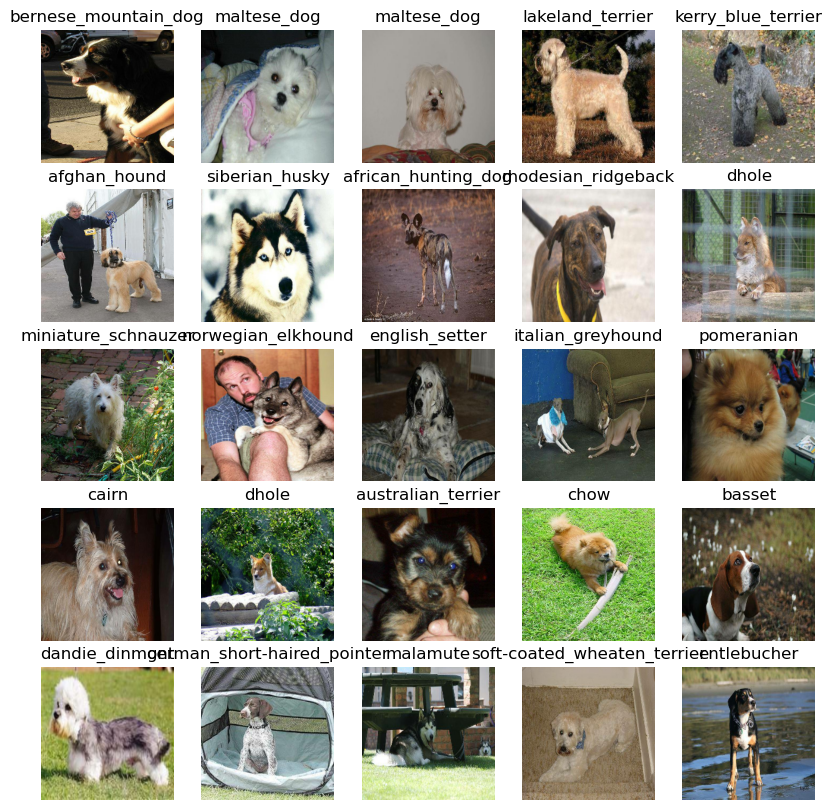

In [35]:
# Now lets visualize our data in a training batch
show_25_images(train_images, train_labels)

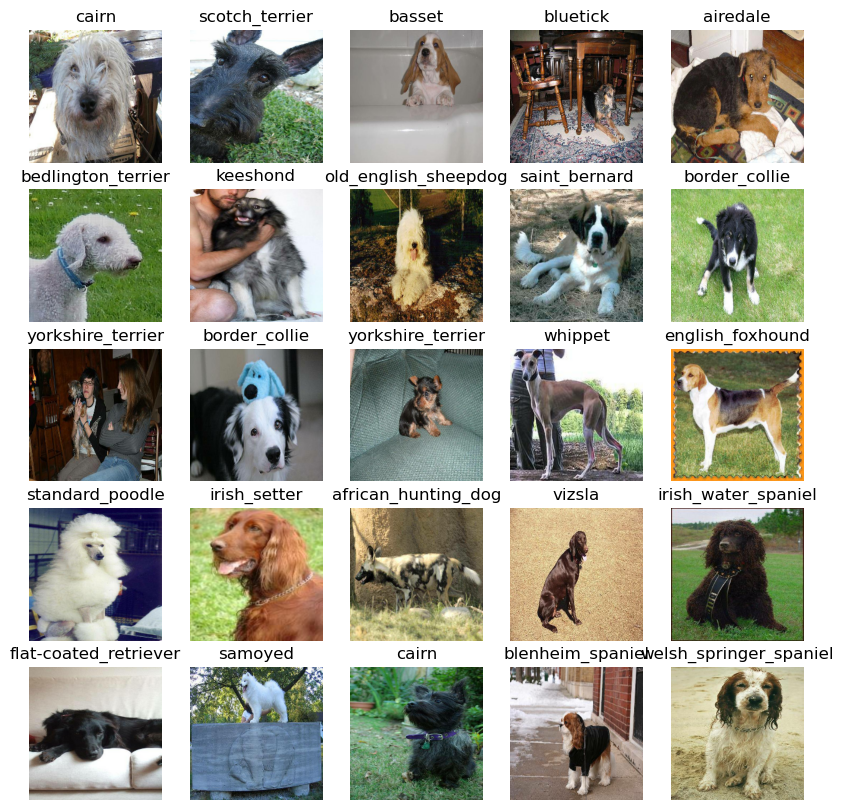

In [36]:
# Visualize validation batch data
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a Model

Before we build a model, there are few things we need to define.
1. Input shape (Our image shapes, in form of tensor) to our model.
2. The output shape (image labels in the form of tensors) of our model.
3. The URL of model we want to use

In [37]:
# The URL wants the IMG_SIZE to be [None, 224, 224, 3] so reinstantiate IMG_SIZE
IMG_SIZE = 224

# Setup input shape to model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]  # Batch, Height, Width, ColorChannel

# Set output shape of model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model from TensorFlow Hub
MODEL_URL = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2"

 Now we've got our inputs, outputs and model, lets put them together into Keras deep laerning model.

 Lets create a function which,
 * Takes input shape, output shape, and model we've chosen as parameters.
 * Defines the layers in keras model in _sequential_ fashion.
 * Compiles the model (says it should be evaluated and improved).
 * Builds the model.
 * Retuns the model.

In [38]:
# Create a function which builds a Keras model
def create_model(
    input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL
):
    print("Building model with:", MODEL_URL)

    # Setup the model layers
    model = tf.keras.Sequential(
        [
            hub.KerasLayer(MODEL_URL),  # Layer 1 (input layer)
            tf.keras.layers.Dense(
                units=OUTPUT_SHAPE, activation="softmax"
            ),  # Layer 2 (output layer)
        ]
    )

    # Compile the model
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),  # Our model wants to reduce this (how wrong its guesses are)
        optimizer=tf.keras.optimizers.Adam(),  # A friend telling our model how to improve its guesses
        metrics=["accuracy"],  # We'd like this to go up
    )

    # Build the model
    model.build(INPUT_SHAPE)  # Let the model know what kind of inputs it'll be getting

    return model

In [39]:
model = create_model()
model.summary()

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


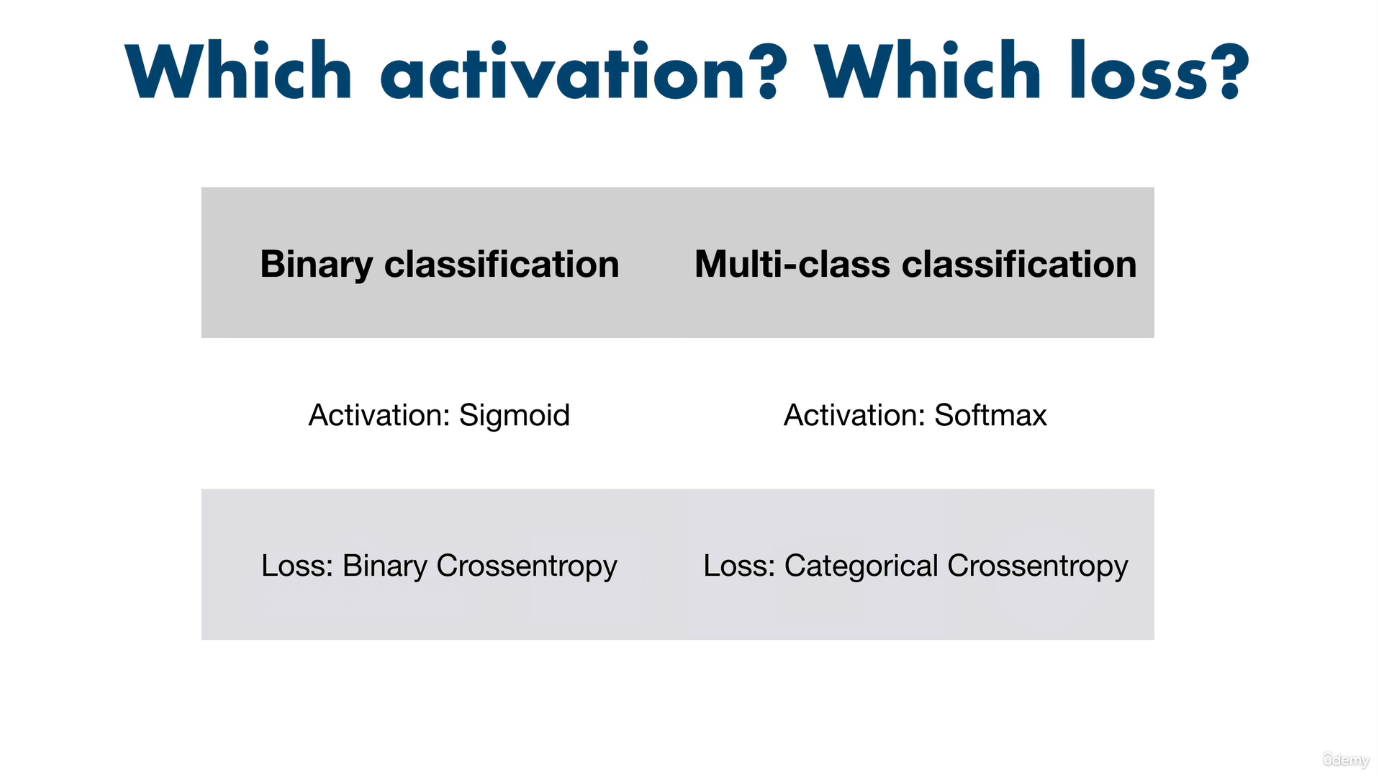

## Creating Callbacks

Callbacks are the helper functions model can use during training to do such things as save its progress, check the progress or stop training early if model stops improving.

We'll create 2 callbacks,
Tensorboard which helps track our models progress and another for early stopping which prevents our model from training too long.

### TensorBoard Callback
To set up a tensorboard callback we need to do 3 things,
1. Load the tensorboard notebook extension
2. Create a tensorboard callbck which is able to save the logs to a directory and pass it to our models `fit()` function.
3. Visulaize our model training logs with the `%tensorboard` magic function. (we'll do this after model training)

In [40]:
# Load tensorboard notebook extension
%load_ext tensorboard

In [41]:
import datetime


# Creating a function to build a TensorBoard Callback
def create_tensorboard_callback():

    # create a log directory for storing tensorboard logs
    logdir = os.path.join(
        "Dog Vision/logs/", datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    )
    return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback
Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

In [42]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

## Training a model
Our first model is only going to train on 1000 images, to make sure everyting is working.

In [43]:
NUM_EPOCHS = 100  # @param{type:'slider',min:10,max:100}

In [44]:
# final check if we use GPU
print(
    "GPU",
    (
        "available(YES!!!!)"
        if tf.config.list_physical_devices("GPU")
        else "not available :("
    ),
)

GPU available(YES!!!!)


### Creating a funcion to train model

* Create a model using `create_model()`
* Setup TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing the training data, validation data, number of epochs to train for `NUM_EPOCHS`
* Return the model


In [45]:
# Build a function to train and return a trained model
def train_model():
    """
    Trains a given model and returns the trained version.
    """
    # Create a model
    model = create_model()

    # Create new TensorBoard session everytime we train a model
    tensorboard = create_tensorboard_callback()

    # Fit the model to the data passing it the callbacks we created
    model.fit(
        x=train_data,
        epochs=NUM_EPOCHS,
        validation_data=val_data,
        validation_freq=1,  # check validation metrics every epoch
        callbacks=[tensorboard, early_stopping],
    )

    return model

In [46]:
model = train_model()

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2
Epoch 1/100
25/25 [==============================] - 12s 106ms/step - loss: 4.5745 - accuracy: 0.0812 - val_loss: 3.2743 - val_accuracy: 0.2650
Epoch 2/100
25/25 [==============================] - 2s 83ms/step - loss: 1.6139 - accuracy: 0.7100 - val_loss: 2.0450 - val_accuracy: 0.5400
Epoch 3/100
25/25 [==============================] - 5s 207ms/step - loss: 0.5518 - accuracy: 0.9438 - val_loss: 1.5935 - val_accuracy: 0.6000
Epoch 4/100
25/25 [==============================] - 5s 189ms/step - loss: 0.2510 - accuracy: 0.9875 - val_loss: 1.4426 - val_accuracy: 0.6200
Epoch 5/100
25/25 [==============================] - 4s 143ms/step - loss: 0.1481 - accuracy: 0.9962 - val_loss: 1.3735 - val_accuracy: 0.6650
Epoch 6/100
25/25 [==============================] - 3s 110ms/step - loss: 0.1021 - accuracy: 0.9962 - val_loss: 1.3240 - val_accuracy: 0.6700
Epoch 7/100
25/25 [===============

### Checking the tensorboard logs

The tensorboard magic function (%tensorboard) will access the log directory we created earlier and visualize its contents.

In [47]:
# %tensorboard --logdir="A:\ZTM ML Course\Dog Vision Project\Dog Vision\logs"

## Making and Evaluating predictions using trained model

In [48]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [49]:
# Make predictions on validation data
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 60ms/step


array([[1.4176937e-03, 2.4651239e-05, 9.9605531e-04, ..., 1.0314688e-04,
        1.9513227e-06, 5.8012578e-04],
       [2.2018568e-03, 6.1067339e-04, 4.7603347e-03, ..., 4.5220245e-04,
        3.6668978e-03, 4.8891801e-05],
       [8.1022190e-06, 1.0035226e-05, 2.0175914e-05, ..., 1.1429846e-04,
        4.5344972e-05, 2.2172915e-04],
       ...,
       [2.5584532e-06, 2.0213463e-05, 2.3240296e-05, ..., 4.4923836e-06,
        4.1482077e-04, 4.1934625e-05],
       [4.9772249e-03, 7.1788796e-05, 1.1409628e-04, ..., 3.3941303e-04,
        4.0967072e-05, 7.1349358e-03],
       [1.5653562e-04, 3.1110481e-05, 4.0265021e-04, ..., 3.3179403e-03,
        2.5185809e-04, 2.5229811e-04]], dtype=float32)

In [50]:
predictions.shape

(200, 120)

In [51]:
np.sum(predictions[0])

1.0

In [52]:
# First prediction
index = 199
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[1.5653562e-04 3.1110481e-05 4.0265021e-04 3.3248452e-04 1.4562450e-03
 1.0131762e-01 4.8649223e-03 2.0580890e-02 9.8706092e-05 1.0379941e-03
 2.6176759e-04 1.7006315e-02 3.7234582e-04 7.8269385e-04 6.6448061e-05
 1.5752610e-04 2.7137629e-03 7.5533608e-04 1.6974677e-04 1.8329151e-02
 7.2799288e-05 1.5415711e-06 2.1238644e-03 4.0171471e-05 6.4261760e-05
 1.7542337e-05 4.0105475e-05 6.2195426e-01 1.6228908e-04 3.7079235e-03
 5.7410820e-05 2.3364848e-04 5.8700018e-05 7.4944235e-02 1.9071005e-04
 1.1003525e-04 3.7782636e-04 1.3279128e-04 5.8230278e-03 2.0498777e-04
 9.9501526e-04 4.7168275e-04 7.3905643e-03 7.2011021e-03 3.2669161e-03
 8.8102734e-06 5.6702178e-04 1.8732109e-04 6.6026092e-05 2.9033050e-05
 1.9481767e-04 5.9787144e-05 4.0781419e-03 3.2356707e-03 1.1069165e-03
 4.5007621e-03 9.0293752e-06 7.1512489e-04 1.2436575e-04 3.4216762e-05
 4.7212784e-04 1.4147515e-02 9.7165153e-05 8.6331839e-04 8.1548293e-05
 5.1307306e-04 4.2412838e-04 1.2321331e-04 2.4614358e-04 3.9460396e-05
 1.849

In [53]:
unique_breeds[5]

'appenzeller'

Having the above functionality is great but we want to do it at scale.<br>
And it would be better if we could visualize our predictions.<br>
**NOTE: ** Prediction probabilities are also known as confidence levels.

In [54]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
    """
    Turns an array of prediction probabilities into a label.
    """
    return unique_breeds[np.argmax(prediction_probabilities)]


# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'dingo'

Since our validation data is in batch data set, we will have to unbatch it to make predictions on the validation images and then compare those predictions with the validation labels(truth labels).

In [55]:
def unbatchify(batch_dataset):
    """
    Takes a batch dataset of (image, label) and returns separate arrays of images and labels.
    """
    images = []
    labels = []

    # Loop through unbatched data
    for image, label in batch_dataset.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
    return images, labels


# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Now we've got ways to get the:
* Prediction Labels
* Validation Labels (Truth Labels)
* Validation Images

Making a function to make all these more visual

We'll create a function which,
* Takes an array of prediction probabilities, An array of truth labels, An array of images and an integers.
* Convert prediction probabilities to prediction label
* Plot the predictive label, its predictive probabilities, the truth label and the target image on a single plot.

In [56]:
def plot_pred(prediction_probabilities, labels, images, n=1):
    """
    View the prediction, ground truth and image of sample n
    """
    pred_proba, truth_label, image = prediction_probabilities[n], labels[n], images[n]

    # Get prediction label
    pred_label = get_pred_label(pred_proba)

    # Change the color depending upon the right or wrong prediction
    if pred_label == truth_label:
        color = "green"
    else:
        color = "red"

    # Plot image and remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    # Changing plot title
    plt.title(
        "{} {:2.0f}% {}".format(pred_label, np.max(pred_proba) * 100, truth_label),
        color=color,
    )

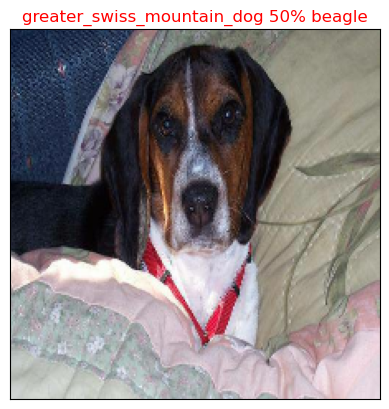

In [57]:
plot_pred(
    prediction_probabilities=predictions, labels=val_labels, images=val_images, n=111
)

Now we've got one function to visuslize our models top prediction, lets make another top 10 predictions.

The function will,
* Take an input of prediction probabilities array, a ground truth array, and an integer.
* Find the predictive label using `get_pred_label()`
* Find the top 10:
    * Prediction probabilities index
    * Prediction probabilities values
    * Prediction labels
* Plot the top 10 prediction values and labels, coloring the label green.

In [58]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
    """
    Plot the top 10 highest 10 prediction confidence along with the truth label for sample n
    """
    pred_prob, true_label = prediction_probabilities[n], labels[n]

    # Get prediction label
    pred_label = get_pred_label(pred_prob)

    # Find top 10 prediction confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

    # Top 10 Prediction confidence values
    top_10_pred_values = pred_prob[top_10_pred_indexes]

    # Find top 10 prediction labels
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]

    # Setup plot
    top_plot = plt.bar(
        np.arange(len(top_10_pred_labels)), top_10_pred_values, color="grey"
    )
    plt.xticks(
        np.arange(len(top_10_pred_labels)),
        labels=top_10_pred_labels,
        rotation="vertical",
    )

    # Change color of true label
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
        pass

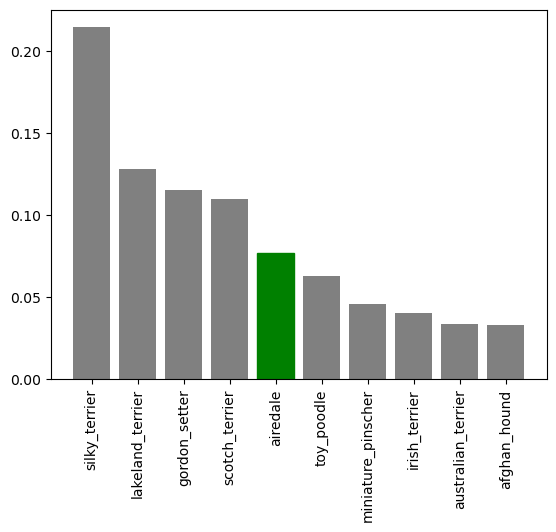

In [59]:
plot_pred_conf(prediction_probabilities=predictions, labels=val_labels, n=69)

Now we've got some function to help us visualize our predictions and evaluate our model, lets check a few.

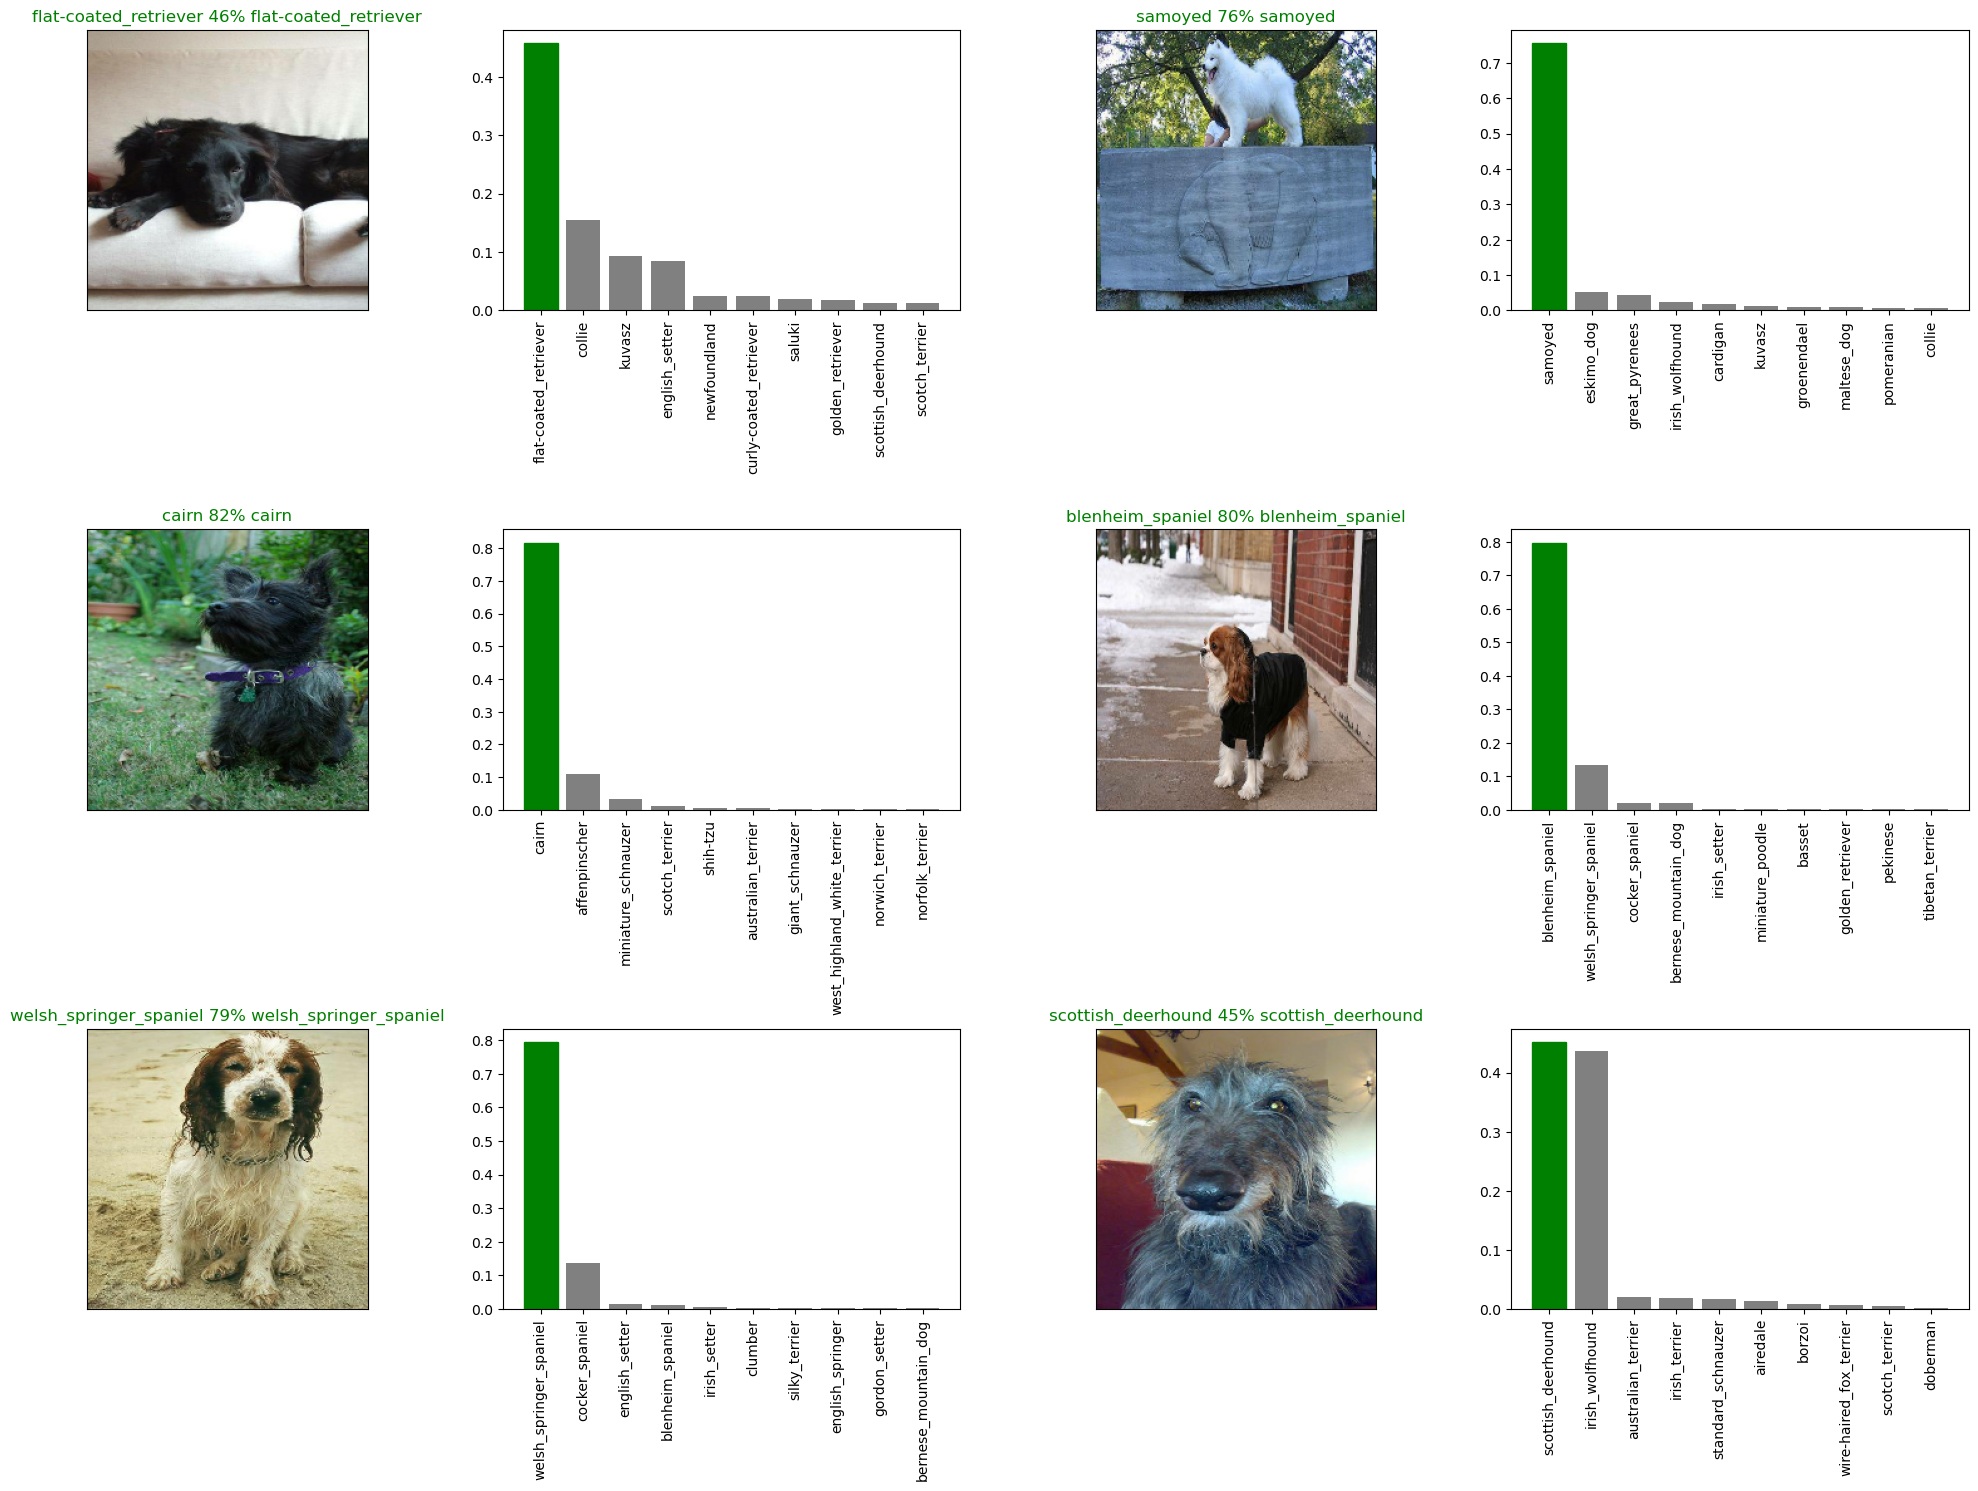

In [60]:
# Lets check out a few predictions and their different value
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(10 * num_cols, 5 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_pred(
        prediction_probabilities=predictions,
        labels=val_labels,
        images=val_images,
        n=i + i_multiplier,
    )
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_pred_conf(
        prediction_probabilities=predictions, labels=val_labels, n=i + i_multiplier
    )
plt.tight_layout(h_pad=1.0)
plt.show()

In [61]:
def predict_label_conv(prediction_probabilities):
    pred_label_str = []
    for i in range(len(prediction_probabilities)):
        pred_label_str.append(unique_breeds[np.argmax(prediction_probabilities[i])])
    return pred_label_str

In [62]:
from seaborn import heatmap
from sklearn.metrics import confusion_matrix

predicted_labels = predict_label_conv(predictions)
confusion_matrix(val_labels, predicted_labels)

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [63]:
df = pd.crosstab(
    val_labels,
    predicted_labels,
    rownames=["Actual Label"],
    colnames=["predictive labels"],
)

Text(470.58159722222223, 0.5, 'True Label')

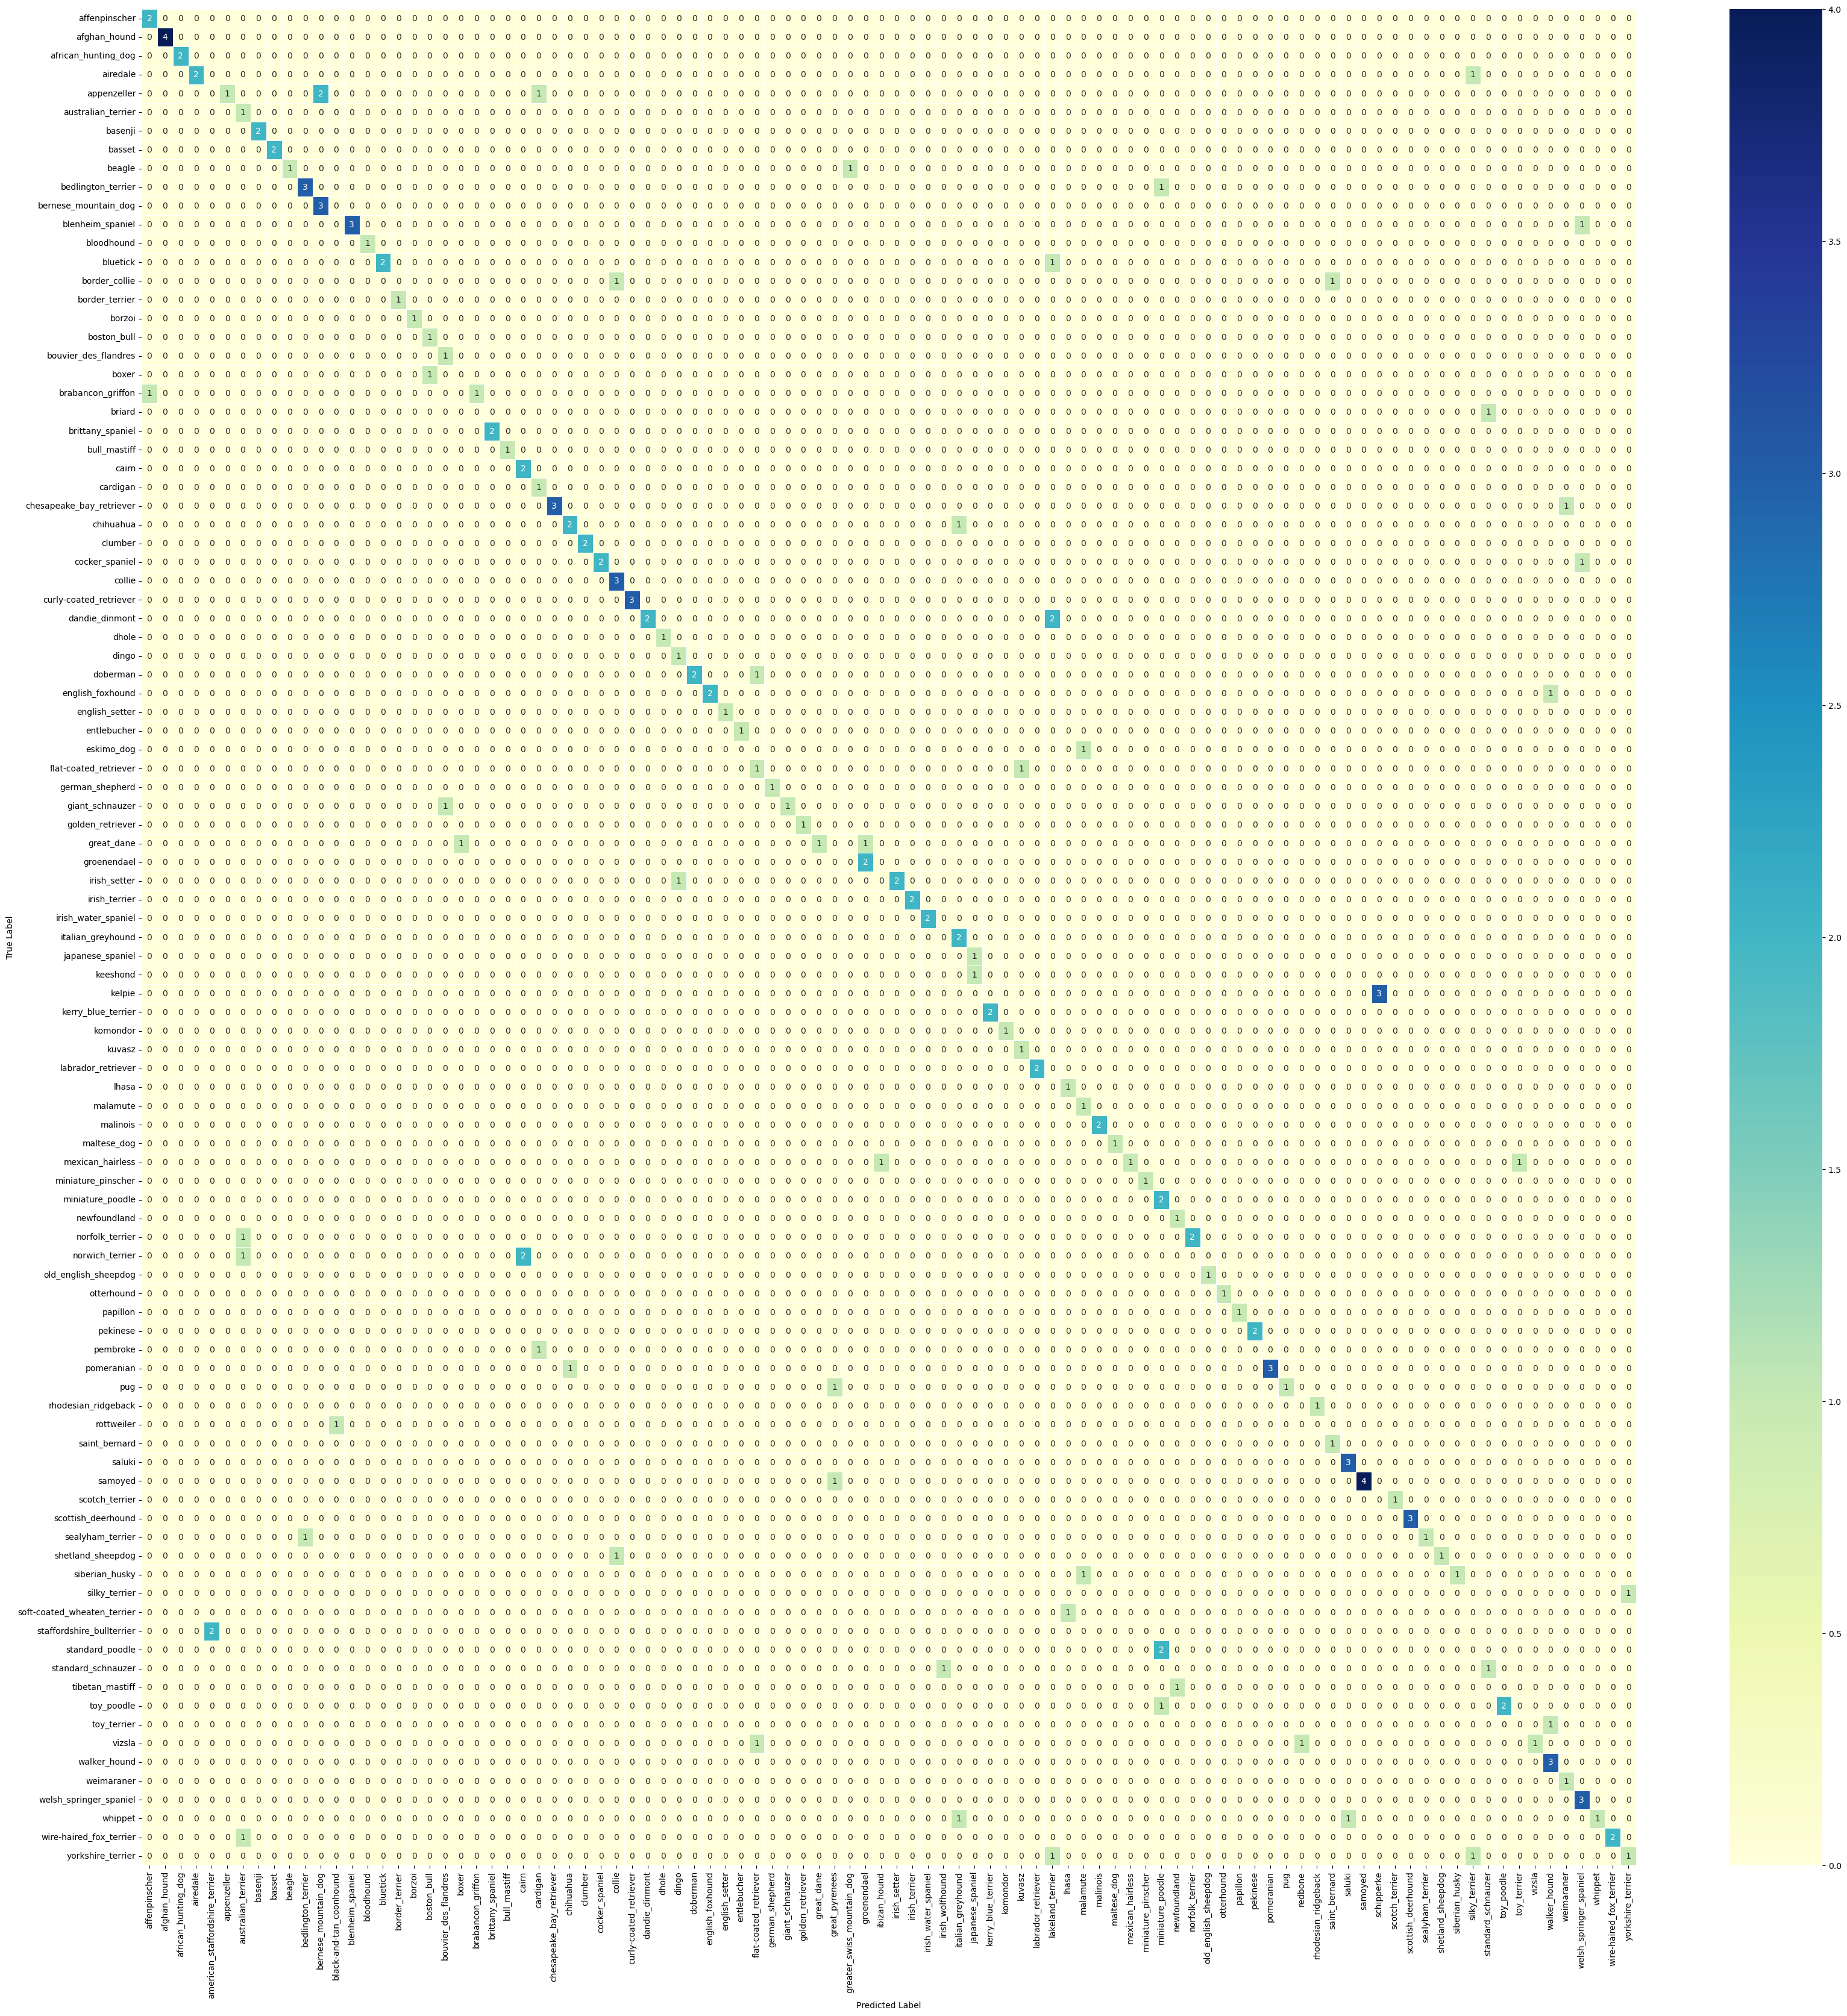

In [64]:
fig, ax = plt.subplots(figsize=(40, 40))
ax = heatmap(
    df,
    annot=True,
    linewidths=0.5,
    fmt="d",
    cmap="YlGnBu",
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

## Saving and Reloading a Trained Model

In [65]:
# Create a function to save a model
def save_model(model, suffix=None):
    """
    Saves a given model in a models directory and appends a suffix (string).
    """

    # Create a model directory pathname with current time
    modeldir = os.path.join(
        "Dog Vision/models/", datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    )
    model_path = modeldir + "_" + suffix + ".h5"
    print(f"saving model to: {model_path}...")
    model.save(model_path)
    return model_path

In [66]:
# Create a function to load a trained model
def load_model(model_path):
    """
    Loads a saved model from a specified path
    """
    print(f"Loading saved model from: {model_path}")
    model = tf.keras.models.load_model(
        model_path, custom_objects={"KerasLayer": hub.KerasLayer}
    )
    return model

Now we've functions to save and load a trained model, lets make sure they work!

In [67]:
# Save our model trained on 1000 images
save_model(model=model, suffix="1000-images-model")

saving model to: Dog Vision/models/20240721-173647_1000-images-model.h5...


'Dog Vision/models/20240721-173647_1000-images-model.h5'

In [68]:
# Load a trained model
image_model_1000 = load_model("Dog Vision/models/20240717-160957_1000-images-model.h5")

Loading saved model from: Dog Vision/models/20240717-160957_1000-images-model.h5


In [69]:
model.evaluate(val_data)

7/7 [==============================] - 1s 57ms/step - loss: 1.1988 - accuracy: 0.6950


[1.1987712383270264, 0.6949999928474426]

In [70]:
image_model_1000.evaluate(val_data)

7/7 [==============================] - 1s 55ms/step - loss: 1.2728 - accuracy: 0.6700


[1.272800326347351, 0.6700000166893005]

## Training a Big Dog Model 🐶 on full data

In [71]:
len(X), len(y)

(10222, 10222)

In [72]:
# Create a data batch with the full dataset
full_data = create_data_batches(X, y)

Creating training data batches


In [73]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [74]:
# Create a model for full_model
full_model = create_model()

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2


In [75]:
# Creating full model callbacks
full_model_tensorboard = create_tensorboard_callback()

# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="accuracy", patience=3
)

**NOTE:** Running the cell below will take a little while (maybe up to 30 minutes for the first epoch) because the GPU we're using in the runtime has to load all of the images into memory.

In [76]:
full_model.fit(
    x=full_data,
    epochs=NUM_EPOCHS,
    callbacks=[full_model_tensorboard, full_model_early_stopping],
)

Epoch 1/100
320/320 [==============================] - 40s 115ms/step - loss: 1.3240 - accuracy: 0.6723
Epoch 2/100
320/320 [==============================] - 41s 129ms/step - loss: 0.4005 - accuracy: 0.8820
Epoch 3/100
320/320 [==============================] - 41s 129ms/step - loss: 0.2351 - accuracy: 0.9350
Epoch 4/100
320/320 [==============================] - 45s 141ms/step - loss: 0.1508 - accuracy: 0.9635
Epoch 5/100
320/320 [==============================] - 51s 161ms/step - loss: 0.1066 - accuracy: 0.9781
Epoch 6/100
320/320 [==============================] - 52s 164ms/step - loss: 0.0786 - accuracy: 0.9864
Epoch 7/100
320/320 [==============================] - 50s 155ms/step - loss: 0.0582 - accuracy: 0.9921
Epoch 8/100
320/320 [==============================] - 45s 142ms/step - loss: 0.0463 - accuracy: 0.9939
Epoch 9/100
320/320 [==============================] - 46s 143ms/step - loss: 0.0370 - accuracy: 0.9961
Epoch 10/100
320/320 [==============================] - 47s 148m

In [77]:
save_model(full_model, suffix="full-image-set-mobilev2-Adam")

saving model to: Dog Vision/models/20240721-175026_full-image-set-mobilev2-Adam.h5...


'Dog Vision/models/20240721-175026_full-image-set-mobilev2-Adam.h5'

In [78]:
# Load the full model
load_full_model = load_model(
    "Dog Vision/models/20240717-180059_full-image-set-mobilev2-Adam.h5"
)

Loading saved model from: Dog Vision/models/20240717-180059_full-image-set-mobilev2-Adam.h5


## Making predictions on the test dataset

Since our model has been trained on the images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created `create_data_batches()` earlier which can take a list of filename as input and convert them into Tensor batches.

To make predictions on the test data, we'll,
* Get the test image filenames
* Convert te filenames into test data batches using `create_data_batches()` and setting the test data parameter to `True` (Since the test data dosen't have labels)
* Make a predictions array by passing the test batches to the `predict()` method called on our model.

In [79]:
# Load test image filenames
test_path = "Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['Dog Vision/test/000621fb3cbb32d8935728e48679680e.jpg',
 'Dog Vision/test/00102ee9d8eb90812350685311fe5890.jpg',
 'Dog Vision/test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'Dog Vision/test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'Dog Vision/test/001a5f3114548acdefa3d4da05474c2e.jpg',
 'Dog Vision/test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 'Dog Vision/test/002c2a3117c2193b4d26400ce431eebd.jpg',
 'Dog Vision/test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 'Dog Vision/test/002f80396f1e3db687c5932d7978b196.jpg',
 'Dog Vision/test/0036c6bcec6031be9e62a257b1c3c442.jpg']

In [80]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [81]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

**NOTE:** Calling `predict()` on full model and passing it the test data batch will take a long time to run (about 1 hour)

In [82]:
# Make predictions on test data batch using the loaded full model
test_predictions = load_full_model.predict(test_data, verbose=1)

324/324 [==============================] - 34s 105ms/step


In [83]:
# Save predictions (Numpy Array) to CSV file (to access later)
np.savetxt("Dog Vision/preds_array.csv", test_predictions, delimiter=",")

In [84]:
test_predictions = np.loadtxt("Dog Vision/preds_array.csv", delimiter=",")

In [85]:
test_predictions[:10]

array([[4.12131809e-13, 8.64715946e-14, 1.68848845e-16, ...,
        4.04973175e-16, 2.74971088e-11, 4.23634896e-13],
       [1.66511779e-06, 6.61586853e-07, 8.41307735e-09, ...,
        2.43318941e-11, 6.40274109e-08, 4.01505995e-10],
       [9.62673864e-12, 2.54726137e-06, 3.51644722e-08, ...,
        3.55222305e-08, 7.63012431e-11, 7.68071787e-11],
       ...,
       [1.29028599e-09, 4.26712450e-11, 6.33858729e-11, ...,
        1.89220623e-12, 1.66846842e-12, 1.89081095e-11],
       [2.35836541e-11, 1.60173347e-10, 1.32414565e-10, ...,
        4.62703440e-07, 9.31820288e-10, 4.84220893e-11],
       [1.82661081e-10, 1.23406155e-11, 3.54652635e-12, ...,
        7.97871765e-14, 1.00007138e-11, 4.24666169e-08]])

In [86]:
test_predictions.shape

(10357, 120)

## Preparing test dataset predictions for kaggle

Looking at the kaggle sample submission, we find that it want our model predictions probability output in a DataFrame with an ID and a column for each different dog breed.

To get the data in the specific format,
* Create a pandas Dataframe with id column as well as a column for dog breed.
* Addd data to the ID column by extracting the test image ID's from their filepaths.
* Add data (the prediction probabilities) to each of the column.
* Export the DataFrame as a CSV to submit it to Kaggle.

In [87]:
# Create a pandas dataframe with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [88]:
# Append test image id to predictions database
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids
preds_df

id affenpinscher afghan_hound  \
0      000621fb3cbb32d8935728e48679680e           NaN          NaN   
1      00102ee9d8eb90812350685311fe5890           NaN          NaN   
2      0012a730dfa437f5f3613fb75efcd4ce           NaN          NaN   
3      001510bc8570bbeee98c8d80c8a95ec1           NaN          NaN   
4      001a5f3114548acdefa3d4da05474c2e           NaN          NaN   
...                                 ...           ...          ...   
10352  ffeda8623d4eee33c6d1156a2ecbfcf8           NaN          NaN   
10353  fff1ec9e6e413275984966f745a313b0           NaN          NaN   
10354  fff74b59b758bbbf13a5793182a9bbe4           NaN          NaN   
10355  fff7d50d848e8014ac1e9172dc6762a3           NaN          NaN   
10356  fffbff22c1f51e3dc80c4bf04089545b           NaN          NaN   

      african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                     NaN      NaN                            NaN         NaN   
1                     NaN      NaN                            NaN         NaN   
2                     NaN      NaN                            NaN         NaN   
3                     NaN      NaN                            NaN         NaN   
4                     NaN      NaN                            NaN         NaN   
...                   ...      ...                            ...         ...   
10352                 NaN      NaN                            NaN         NaN   
10353                 NaN      NaN                            NaN         NaN   
10354                 NaN      NaN                            NaN         NaN   
10355                 NaN      NaN                            NaN         NaN   
10356                 NaN      NaN                            NaN         NaN   

      australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
...                  ...     ...    ...  ...        ...         ...    ...   
10352                NaN     NaN    NaN  ...        NaN         NaN    NaN   
10353                NaN     NaN    NaN  ...        NaN         NaN    NaN   
10354                NaN     NaN    NaN  ...        NaN         NaN    NaN   
10355                NaN     NaN    NaN  ...        NaN         NaN    NaN   
10356                NaN     NaN    NaN  ...        NaN         NaN    NaN   

      walker_hound weimaraner welsh_springer_spaniel  \
0              NaN        NaN                    NaN   
1              NaN        NaN                    NaN   
2              NaN        NaN                    NaN   
3              NaN        NaN                    NaN   
4              NaN        NaN                    NaN   
...            ...        ...                    ...   
10352          NaN        NaN                    NaN   
10353          NaN        NaN                    NaN   
10354          NaN        NaN                    NaN   
10355          NaN        NaN                    NaN   
10356          NaN        NaN                    NaN   

      west_highland_white_terrier whippet wire-haired_fox_terrier  \
0                             NaN     NaN                     NaN   
1                             NaN     NaN                     NaN   
2                             NaN     NaN                     NaN   
3                             NaN     NaN                     NaN   
4                             NaN     NaN                     NaN   
...                           ...     ...                     ...   
10352                         NaN     NaN                     NaN   
10353                         NaN     NaN                    

In [89]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df[:10]

id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e   4.121318e-13  8.647159e-14   
1  00102ee9d8eb90812350685311fe5890   1.665118e-06  6.615869e-07   
2  0012a730dfa437f5f3613fb75efcd4ce   9.626739e-12  2.547261e-06   
3  001510bc8570bbeee98c8d80c8a95ec1   7.900492e-07  3.909284e-08   
4  001a5f3114548acdefa3d4da05474c2e   1.371317e-04  2.094932e-05   
5  00225dcd3e4d2410dd53239f95c0352f   4.367580e-13  2.456093e-01   
6  002c2a3117c2193b4d26400ce431eebd   1.915466e-11  1.103545e-10   
7  002c58d413a521ae8d1a5daeb35fc803   1.290286e-09  4.267125e-11   
8  002f80396f1e3db687c5932d7978b196   2.358365e-11  1.601733e-10   
9  0036c6bcec6031be9e62a257b1c3c442   1.826611e-10  1.234062e-11   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         1.688488e-16  1.091831e-15                    7.691937e-15   
1         8.413077e-09  3.401102e-10                    1.660936e-06   
2         3.516447e-08  5.190991e-11                    9.337427e-12   
3         5.314474e-07  5.998733e-06                    3.722995e-05   
4         1.252118e-08  1.091113e-09                    1.384763e-09   
5         6.572833e-12  5.760737e-06                    7.942585e-10   
6         1.302146e-09  1.176692e-09                    2.032877e-09   
7         6.338587e-11  1.697680e-13                    1.298128e-09   
8         1.324146e-10  2.413099e-08                    5.322639e-12   
9         3.546526e-12  4.928543e-12                    6.486316e-11   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  3.535419e-13        1.587760e-18  1.297411e-14  4.645736e-15  ...   
1  6.199239e-09        1.564738e-06  5.676023e-07  1.401755e-08  ...   
2  1.385629e-08        3.858778e-12  2.704343e-12  4.158158e-09  ...   
3  1.418282e-07        1.136132e-10  3.629983e-10  6.856189e-09  ...   
4  8.239693e-12        7.118090e-11  3.249920e-09  3.067347e-09  ...   
5  9.016607e-10        1.198817e-11  3.857102e-07  1.037880e-10  ...   
6  1.540213e-11        9.999688e-01  7.181872e-09  1.188836e-11  ...   
7  1.049000e-11        3.547939e-09  1.142149e-10  5.534467e-12  ...   
8  5.456639e-13        6.237013e-14  2.211390e-13  3.746063e-14  ...   
9  1.979506e-14        7.414955e-11  3.681003e-15  9.805292e-10  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  2.262999e-14  8.488930e-16  5.586386e-16  1.135554e-16  1.986925e-15   
1  7.977931e-09  1.866467e-07  2.239173e-09  1.972714e-06  8.733946e-09   
2  7.962069e-12  2.848348e-11  9.583010e-08  1.036029e-06  5.771229e-08   
3  2.931459e-07  3.068230e-10  9.132571e-07  3.919105e-10  1.712778e-07   
4  1.198305e-07  1.020230e-10  7.930345e-11  2.149773e-11  6.610767e-10   
5  7.187574e-01  7.864077e-14  2.766654e-07  2.085846e-09  2.035645e-08   
6  4.405710e-12  2.801386e-08  6.707999e-11  3.063370e-11  2.581054e-11   
7  1.365839e-10  1.971985e-10  1.725212e-11  2.330899e-10  8.932854e-12   
8  7.614941e-12  1.384410e-12  5.691731e-12  1.730503e-10  1.329491e-09   
9  1.725421e-09  3.401360e-11  1.833869e-07  2.996027e-11  1.635353e-07   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            8.119285e-15                 3.071089e-15  4.049732e-16   
1            6.614837e-08                 3.342505e-04  2.433189e-11   
2            3.398378e-08                 5.808411e-12  3.552223e-08   
3            2.707461e-10                 7.647408e-16  2.463573e-03   
4            1.492341e-10                 6.969635e-12  8.165326e-10   
5            1.754488e-11                 8.132182e-13  3.426222e-07   
6            1.939697e-12                 3.840294e-09  4.552397e-13   
7            2.352334e-12                 4.777996e-07  1.892206e-12   
8            1.754501e-12                 6.474486e-12  4.627034e-07   
9            5.603091e-12                 5.204748e-11  7.978718e-14   

   wire-haired_fox_terrier  yorkshire_terrier  
0             2.749711e-11     

In [90]:
# Saving our predictions dataframe to CSV for submission on Kaggle
preds_df.to_csv(
    "Dog Vision/full_model_predictions_submission_mobileNetV2.csv", index=False
)

## Making predictions on custom images

To make predictions on custom images,
* We need to get filepaths of our own images.
* Turn the filepaths in data batches using `create_data_batches()`. And since our custom images won't have labels, we set the `test_data` parameter to `True`.
* Pass the custom image data batch to our model's `predict()` method.
* Convert prediction output probabilities to prediction labels.
* Compare the predicted images to the custom images.

In [ ]:
# Get custom file path
import os

custom_path = "Dog Vision/my-dog-images/"
custom_image_path = [custom_path + fname for fname in os.listdir(custom_path)]
custom_image_path

In [ ]:
# Turn custom images into data batches
custom_data = create_data_batches(custom_image_path, test_data=True)
custom_data

In [ ]:
# Make predictions on custom data
custom_preds = load_full_model.predict(custom_data)

In [ ]:
custom_preds.shape

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

In [96]:
# Get custom images (unbatchify() wont work as we dont have labels)
custom_images = []

# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)

In [ ]:
# Check custom predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
    plt.subplot(1, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_pred_labels[i])
    plt.imshow(image)